# Lab 1

- [ ] LABEL In grafico ETA
- [ ] DESCRIZIONI VELOCI DI GRAFICI
- [ ] METTERE I TITOLI AI GRAFICI
- [ ] TITOLOSTUDIO LABEL
- [ ] BOXPLOT DATA IN UN GRAFICO?

## The main question

The dataset that we will present you contains data related to contracts activated and ceased in Lombardy. 
The **main question** is to estimate the total amount of activated and ceased contracts for a specific month, year, study qualification, province. The machine learning algorithm will be trained with the selected features in order to compute a forecast estimation.

## Imports

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Datasets Analysis

[__Dataset 1 Link__](https://www.dati.lombardia.it/Attivit-Produttive/Rapporti-di-lavoro-attivati/qbau-cyuc)

[__Dataset 2 Link__](https://www.dati.lombardia.it/Attivit-Produttive/Rapporti-di-lavoro-cessati/nwz3-p6vm)

In [3]:
#Loading dataset
activated_work = pd.read_csv("Rapporti_di_lavoro_attivati.csv")

In [4]:
ceased_work = pd.read_csv("Rapporti_di_lavoro_cessati.csv")

In [4]:
print('Number of elements in the ACTIVATED dataset: %d' %(activated_work.size / activated_work.columns.size))

Number of elements in the ACTIVATED dataset: 9579794


In [5]:
print('Number of elements in the CEASED dataset: %d' %(ceased_work.size / ceased_work.columns.size))

Number of elements in the CEASED dataset: 3741394


In [6]:
activated_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9579794 entries, 0 to 9579793
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DATA                       object
 1   GENERE                     object
 2   ETA                        int64 
 3   SETTOREECONOMICODETTAGLIO  object
 4   TITOLOSTUDIO               object
 5   CONTRATTO                  object
 6   MODALITALAVORO             object
 7   PROVINCIAIMPRESA           object
 8   ITALIANO                   object
dtypes: int64(1), object(8)
memory usage: 657.8+ MB


In [7]:
ceased_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3741394 entries, 0 to 3741393
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DATA                       object
 1   GENERE                     object
 2   ETA                        int64 
 3   SETTOREECONOMICODETTAGLIO  object
 4   TITOLOSTUDIO               object
 5   CONTRATTO                  object
 6   MODALITALAVORO             object
 7   PROVINCIAIMPRESA           object
 8   ITALIANO                   object
dtypes: int64(1), object(8)
memory usage: 256.9+ MB


In [8]:
activated_work.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA


In [9]:
ceased_work.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,02/04/2019,M,20,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
1,08/06/2018,F,28,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
2,02/02/2016,F,20,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/01/2015,M,59,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
4,09/08/2017,M,61,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA


From the dataset head we can understand that the dataset contains 9 features:
- Data
- Genere
- Settore Economico Dettaglio
- Titolo di Studio
- Contratto
- Modalità di lavoro
- Provincia impresa
- Italiano

In [10]:
print('--- Unique Values Count for each feature in ACTIVATED ---')
print(activated_work.nunique())

--- Unique Values Count for each feature in ACTIVATED ---
DATA                         2001
GENERE                          2
ETA                           103
SETTOREECONOMICODETTAGLIO    1224
TITOLOSTUDIO                   12
CONTRATTO                      54
MODALITALAVORO                  5
PROVINCIAIMPRESA               12
ITALIANO                      199
dtype: int64


In [11]:
print('--- Unique Values Count for each feature in CEASED ---')
print(ceased_work.nunique())

--- Unique Values Count for each feature in CEASED ---
DATA                         2323
GENERE                          2
ETA                           103
SETTOREECONOMICODETTAGLIO    1205
TITOLOSTUDIO                   12
CONTRATTO                      54
MODALITALAVORO                  5
PROVINCIAIMPRESA               12
ITALIANO                      197
dtype: int64


In [12]:
#Nan Values count
print('--- NAN Values Count for each feature in CEASED ---')
print(activated_work.isnull().sum())

--- NAN Values Count for each feature in CEASED ---
DATA                              0
GENERE                            0
ETA                               0
SETTOREECONOMICODETTAGLIO      2888
TITOLOSTUDIO                    580
CONTRATTO                         0
MODALITALAVORO               440779
PROVINCIAIMPRESA                  0
ITALIANO                          0
dtype: int64


In [13]:
#Nan Values count
print('--- NAN Values Count for each feature in CEASED ---')
print(ceased_work.isnull().sum())

--- NAN Values Count for each feature in CEASED ---
DATA                            0
GENERE                          0
ETA                             0
SETTOREECONOMICODETTAGLIO    1019
TITOLOSTUDIO                  440
CONTRATTO                       0
MODALITALAVORO                  0
PROVINCIAIMPRESA                0
ITALIANO                        0
dtype: int64


In [13]:
print('\033[1m' + 'Number of duplicated elements in activated:'+ '\033[0m'+' %s' %activated_work.duplicated().value_counts()[1])

Number of unique elements in activated: 1009435


In [11]:
print('\033[1m' + 'Number of unique elements in activated:'+ '\033[0m'+' %s' %activated_work.duplicated().value_counts())

Number of unique elements in activated: False    8570359
True     1009435
dtype: int64


In [15]:
print('__Number of unique elements in activated__: %s' %ceased_work.duplicated().value_counts()[1])

__Number of unique elements in activated__: 131656


Form the column 'ITALIANO' we can understand that it is referred to the nationality of the person involved, so we decided to rename it in 'NAZIONALITA'

In [16]:
activated_work.rename(columns={'ITALIANO':'NAZIONALITA'}, inplace=True)

In [17]:
ceased_work.rename(columns={'ITALIANO':'NAZIONALITA'}, inplace=True)

## Merging Dataset

In [18]:
activated_work['TIPOLOGIA'] = 'ATTIVATO'

In [22]:
ceased_work['TIPOLOGIA'] = 'CESSATO'

In [23]:
total = [activated_work, ceased_work]

result = pd.concat(total)

result_df = pd.DataFrame(result)

## Graphical Analysis

#### - DATA ACTIVATED

In [73]:
tempDF = result_df.copy()
tempDF['DATA'] = pd.to_datetime(tempDF['DATA'], errors = 'coerce', format='%d/%m/%Y')
tempDF['YEAR']= tempDF['DATA'].dt.year
tempDF['MONTH']= tempDF['DATA'].dt.month
#2600 entry is ignored in the following plots, workaround because it exceeds representation limit
#insert it manually, 12/11/2600

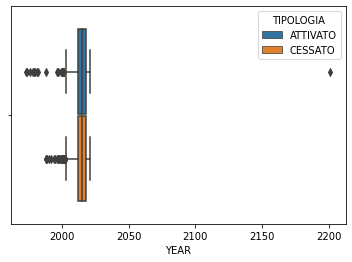

In [74]:
ax = sb.boxplot(x=tempDF['YEAR'], y=[""]*len(tempDF), hue=tempDF['TIPOLOGIA'])
#workaround cause bug, y needs to be filled with dummy data
plt.show()

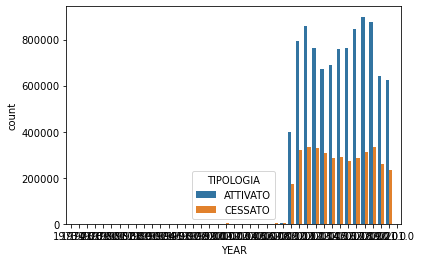

In [81]:
ax = sb.countplot(data=tempDF, x='YEAR', hue = 'TIPOLOGIA')
#todo
plt.show()

In [24]:
#tempDF['MONTH'] = pd.DatetimeIndex(tempDF['DATA']).month

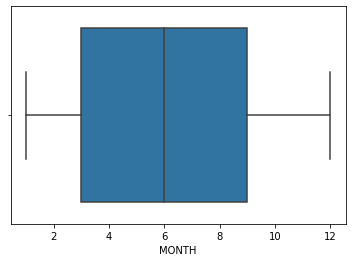

In [79]:
ax = sb.boxplot(data=tempDF, x="MONTH", hue = 'TIPOLOGIA')
plt.show()

#### - DATA CEASED

In [26]:
tempDF = ceased_work.copy()
tempDF['DATA'] = pd.to_datetime(tempDF['DATA'], errors = 'coerce')
tempDF['YEAR'] = pd.DatetimeIndex(tempDF['DATA']).year

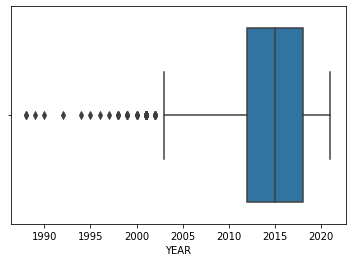

In [27]:
ax = sb.boxplot(data=tempDF, x="YEAR")
plt.show()

In [28]:
tempDF['MONTH'] = pd.DatetimeIndex(tempDF['DATA']).month

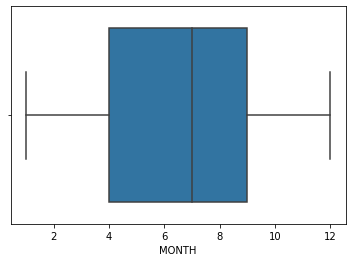

In [29]:
ax = sb.boxplot(data=tempDF, x="MONTH")
plt.show()

#### - GENERE

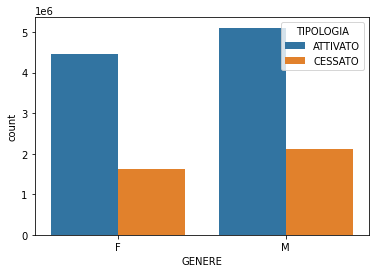

In [30]:
ax = sb.countplot(data=result_df, x="GENERE", hue="TIPOLOGIA")
plt.show()

#### - GENERE vs ETA

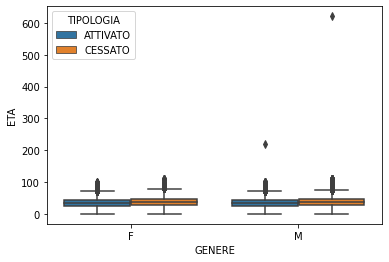

In [31]:
ax =  sb.boxplot(x="GENERE", y="ETA", hue="TIPOLOGIA", data=result_df)
plt.show()

From this boxplot we can understand that some data are wrong, since there are values higher than 80 years represented in the plot as outliers.
From the following graph we can understand better the distribution of the feature 'ETA'

#### - ETA

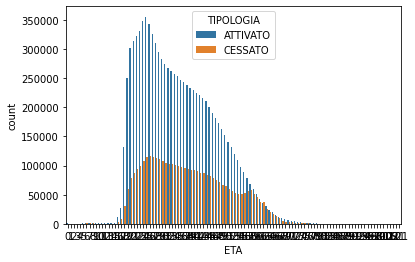

In [32]:
ax = sb.countplot(data=result_df, x="ETA", hue="TIPOLOGIA")
## todo
plt.show()

#### - SETTOREECONOMICODETTAGLIO ACTIVATED

'SETTOREECONOMICODETTAGLIO' contains 1224 unique values, therefore we will show the first 20 values

In [33]:
sr = activated_work.groupby('SETTOREECONOMICODETTAGLIO').size().sort_values(ascending=False)[:20]

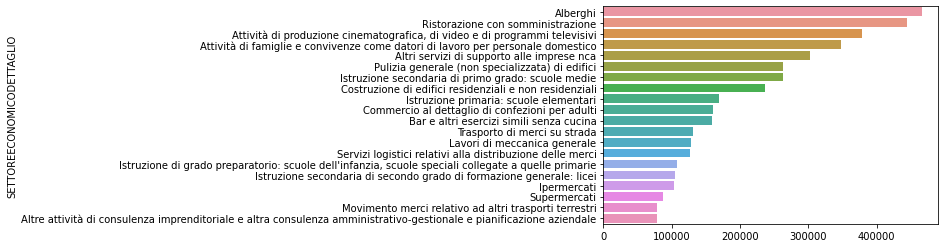

In [34]:
ax = sb.barplot(x=sr.values, y=sr.index)

#### - SETTOREECONOMICODETTAGLIO CEASED

In [35]:
sr = ceased_work.groupby('SETTOREECONOMICODETTAGLIO').size().sort_values(ascending=False)[:20]

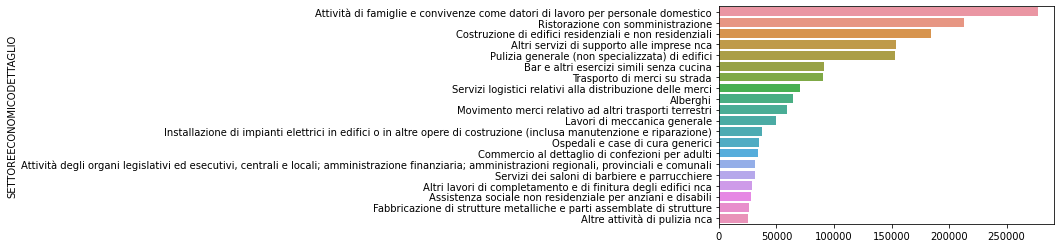

In [36]:
ax = sb.barplot(x=sr.values, y=sr.index) 

#### - TITOLOSTUDIO

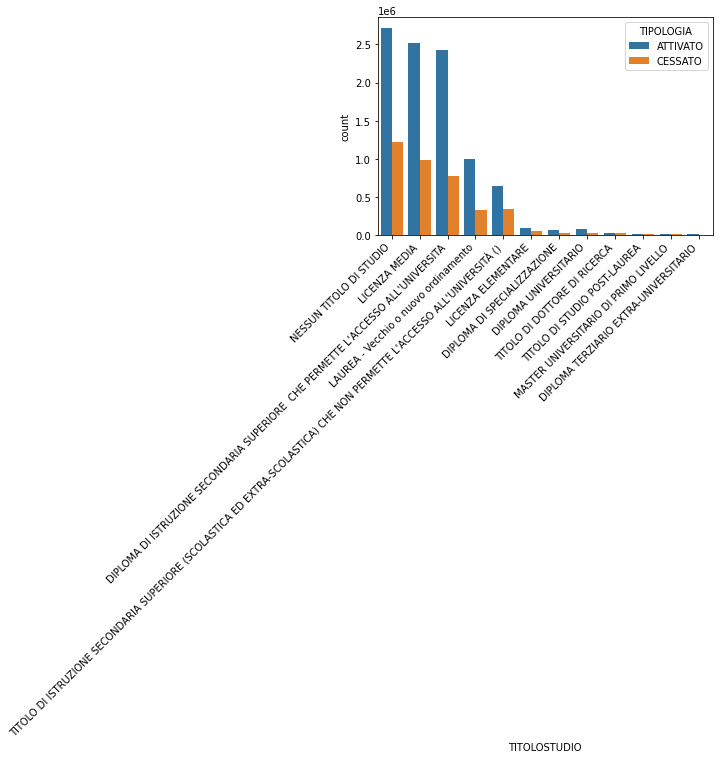

In [37]:
ax = sb.countplot(data=result_df, x="TITOLOSTUDIO", hue='TIPOLOGIA')
# todo
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

#### - CONTRATTO ACTIVATED

In [38]:
sr = activated_work.groupby('CONTRATTO').size().sort_values(ascending=False)[:10]

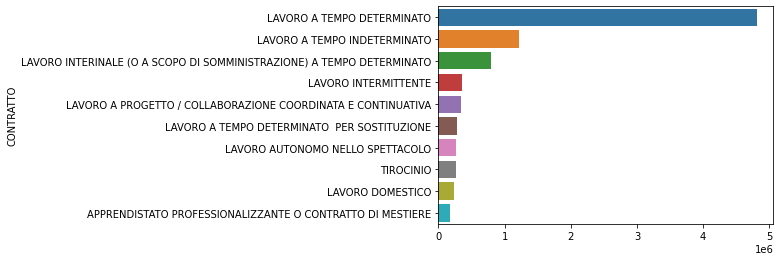

In [39]:
ax = sb.barplot(x=sr.values, y=sr.index)

#### - CONTRATTO CEASED

In [40]:
sr = ceased_work.groupby('CONTRATTO').size().sort_values(ascending=False)[:10]

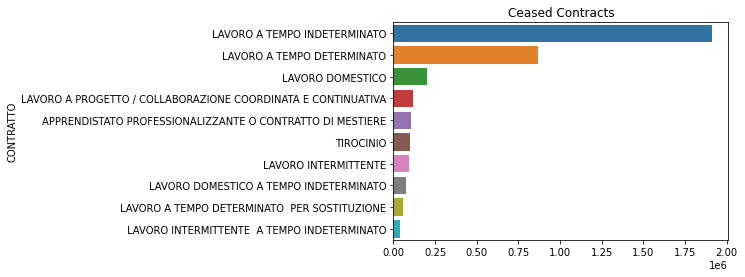

In [41]:
ax = sb.barplot(x=sr.values, y=sr.index)
ax.set_title("Ceased Contracts")
plt.show()

#### - MODALITALAVORO ACTIVATED

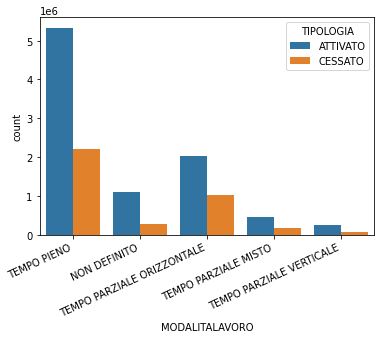

In [42]:
ax = sb.countplot(data=result_df, x="MODALITALAVORO", hue="TIPOLOGIA")
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
plt.show()

#### - PROVINCIAIMPRESA

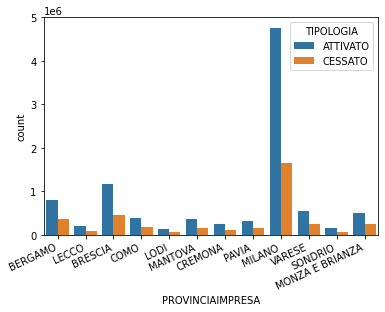

In [43]:
ax = sb.countplot(data=result_df, x="PROVINCIAIMPRESA", hue="TIPOLOGIA")
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
plt.show()

#### - NAZIONALITA ACTIVATED

In [44]:
sr = activated_work.groupby('NAZIONALITA').size().sort_values(ascending=False)[:10]

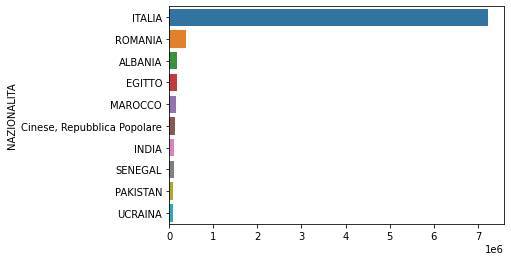

In [45]:
ax = sb.barplot(x=sr.values, y=sr.index)

#### - NAZIONALITA CEASED

In [46]:
sr = ceased_work.groupby('NAZIONALITA').size().sort_values(ascending=False)[:10]

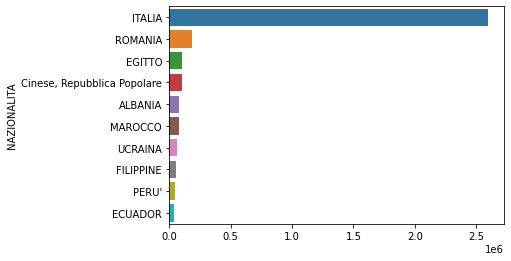

In [47]:
ax = sb.barplot(x=sr.values, y=sr.index)